<ipython-input-2-1b11075361e8>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.strip().str.replace('\W+', ' ').str.replace('to', '-').str.replace('Lessthan', '<')


Number of families in the bottom 5% income bracket: 6928.0
Number of families in the 5-10% income bracket: 12518.208
Number of families in the 10-15% income bracket: 668448.0
Number of families in the bottom 15% income bracket: 7778.0


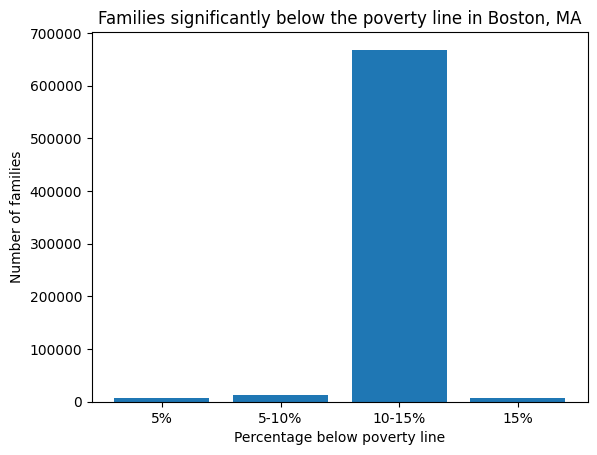

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'question5data.csv.csv'
df = pd.read_csv(file_path, index_col=0)  

df.index.name = None

df.index = df.index.str.strip().str.replace('\W+', ' ').str.replace('to', '-').str.replace('Lessthan', '<')
df = df.replace('(X)', 0)

df = df.apply(lambda x: x.str.replace('%', '').str.replace('±', '').str.replace(',', '').astype(float), axis=1)

column_names = {
    'Boston city, Massachusetts!!Households!!Estimate': 'Households_Estimate',
    'Boston city, Massachusetts!!Households!!Margin of Error': 'Households_Margin_of_Error',
    'Boston city, Massachusetts!!Families!!Estimate': 'Families_Estimate',
    'Boston city, Massachusetts!!Families!!Margin of Error': 'Families_Margin_of_Error',
    'Boston city, Massachusetts!!Married-couple families!!Estimate': 'Married_couple_Families_Estimate',
    'Boston city, Massachusetts!!Married-couple families!!Margin of Error': 'Married_couple_Families_Margin_of_Error',
    'Boston city, Massachusetts!!Nonfamily households!!Estimate': 'Nonfamily_Households_Estimate',
    'Boston city, Massachusetts!!Nonfamily households!!Margin of Error': 'Nonfamily_Households_Margin_of_Error'
}
df = df.rename(columns=column_names)

df.index = ['Total', 'Less_than_10000', '10000_to_14999', '15000_to_24999', '25000_to_34999'] + ['Row_' + str(i) for i in range(5, 17)]


total_families = df.loc['Total', 'Families_Estimate']

families_less_than_10000 = total_families * df.loc['Less_than_10000', 'Families_Estimate'] / 100
families_10000_to_14999 = total_families * df.loc['10000_to_14999', 'Families_Estimate'] / 100
families_15000_to_24999 = total_families * df.loc['15000_to_24999', 'Families_Estimate'] / 100


bottom_5_percent = families_less_than_10000.round()
bottom_10_percent = families_10000_to_14999.round()
bottom_15_percent = families_15000_to_24999.round()


families_5_to_10_percent = total_families * (df.loc['10000_to_14999', 'Families_Estimate'] + df.loc['15000_to_24999', 'Families_Estimate']) / 100
families_10_to_15_percent = total_families * df.loc['25000_to_34999', 'Families_Estimate']
print(f'Number of families in the bottom 5% income bracket: {bottom_5_percent}')
print(f'Number of families in the 5-10% income bracket: {families_5_to_10_percent}')
print(f'Number of families in the 10-15% income bracket: {families_10_to_15_percent}')
print(f'Number of families in the bottom 15% income bracket: {bottom_15_percent}')


fig, ax = plt.subplots()
ax.bar(['5%', '5-10%', '10-15%', '15%'], [bottom_5_percent, families_5_to_10_percent, families_10_to_15_percent, bottom_15_percent])
ax.set_ylabel('Number of families')
ax.set_xlabel('Percentage below poverty line')
ax.set_title('Families significantly below the poverty line in Boston, MA')
plt.show()
